In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from scipy.stats.mstats import ttest_ind
from cartopy.util import add_cyclic_point

In [8]:
def AreaWeightMean(data2D, lat, lon):
    '''
    data2D: 要进行区域加权平均的变量  2D: [lat, lon]
    lat: data2D对应的纬度 1D 最好不要包括-90° 和 90°  因为NCL 和 Python 计算 np.cos(90 * rad) 值差的很大 
    lon: data2D对应的经度 1D
    '''
    jlat = lat.shape[0]
    rad = 4.0 * np.arctan(1.0) / 180.0
    re = 6371220.0
    rr = re * rad
    dlon = np.abs(lon[2] - lon[1]) * rr
    dx = dlon * np.cos(lat * rad)
    dy = np.zeros(jlat)
    dy[0] = np.abs(lat[2] - lat[1]) * rr
    dy[1: jlat - 1]  = np.abs(lat[2: jlat]-lat[0: jlat - 2])*rr * 0.5
    dy[jlat - 1] = abs(lat[jlat - 1] - lat[jlat - 2]) * rr
    area = dx * dy
    # dataAreaWeightMean = np.sum(np.dot(area, data2D))/np.sum(area)
    sumtop = 0
    sumbottom = 0
    for id1 in range(data2D.shape[0]):
        for id2 in range(data2D.shape[1]):
            if(not np.isnan(data2D[id1, id2])):
                sumtop = sumtop + data2D[id1, id2]*area[id1]
                sumbottom = sumbottom +area[id1]
    dataAreaWeightMean = sumtop/sumbottom
    return dataAreaWeightMean



def group_year(data0, nyear):
    nmonth = 12
    data = np.zeros((data0.shape[0], data0.shape[1], data0.shape[2], nmonth, nyear))
    for i in range(nyear):
        for j in range(nmonth):
            data[:, :, :, j, i] = data0[:, :, :, int(i*nmonth+j)]
    return data



plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
plt.rcParams['ytick.direction'] = 'in' #y轴刻度是往外还是往内
plt.rcParams['ytick.minor.visible'] = True #y轴是否添加小刻度
plt.rcParams['ytick.major.right'] = True #y轴是否添加大刻度
plt.rcParams['ytick.right'] = True #右边是否显示刻度
plt.rcParams['xtick.top'] = False#是否显示x轴的刻度

# 坐标轴加粗与字体加粗
# ax1.spines['top'].set_linewidth(3)
# ax1.spines['right'].set_linewidth(3)
# ax1.spines['bottom'].set_linewidth(3)
# ax1.spines['left'].set_linewidth(3)
# plt.rcParams['font.weight'] = 'bold'
# 参数weight='bold'

In [9]:
tsa_FC5_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_TSA\\4-EM\\1960-2009_monmean_FC5_LUCC_fix_3EM_TSA.nc')
tsa_FC5_fix2009 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_TSA\\4-EM\\1960-2009_monmean_FC5_LUCC_fix2009_3EM_TSA.nc')
tmax_FC5_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmax\\4-EM\\1960-2009_monmean_FC5_LUCC_fix_3EM_Tmax.nc')
tmax_FC5_fix2009 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmax\\4-EM\\1960-2009_monmean_FC5_LUCC_fix2009_3EM_Tmax.nc')
tmin_FC5_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmin\\4-EM\\1960-2009_monmean_FC5_LUCC_fix_3EM_Tmin.nc')
tmin_FC5_fix2009 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmin\\4-EM\\1960-2009_monmean_FC5_LUCC_fix2009_3EM_Tmin.nc')
dtr_FC5_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_DTR\\4-EM\\1960-2009_monmean_FC5_LUCC_fix_3EM_DTR.nc')
dtr_FC5_fix2009 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_DTR\\4-EM\\1960-2009_monmean_FC5_LUCC_fix2009_3EM_DTR.nc')
tsa_FC5_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_TSA\\4-EM\\1960-2009_monmean_FC5_LUCC_dyn_3EM_TSA.nc')
tmax_FC5_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmax\\4-EM\\1960-2009_monmean_FC5_LUCC_dyn_3EM_Tmax.nc')
tmin_FC5_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmin\\4-EM\\1960-2009_monmean_FC5_LUCC_dyn_3EM_Tmin.nc')
dtr_FC5_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_DTR\\4-EM\\1960-2009_monmean_FC5_LUCC_dyn_3EM_DTR.nc')
tsa_IC45_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_TSA\\4-EM\\1960-2009_monmean_IC45_LUCC_fix_3EM_TSA.nc')
tsa_IC45_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_TSA\\4-EM\\1960-2009_monmean_IC45_LUCC_dyn_3EM_TSA.nc')
tmax_IC45_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmax\\4-EM\\1960-2009_monmean_IC45_LUCC_fix_3EM_Tmax.nc')
tmax_IC45_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmax\\4-EM\\1960-2009_monmean_IC45_LUCC_dyn_3EM_Tmax.nc')
tmin_IC45_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmin\\4-EM\\1960-2009_monmean_IC45_LUCC_fix_3EM_Tmin.nc')
tmin_IC45_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_Tmin\\4-EM\\1960-2009_monmean_IC45_LUCC_dyn_3EM_Tmin.nc')
dtr_IC45_fix1960 = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_DTR\\4-EM\\1960-2009_monmean_IC45_LUCC_fix_3EM_DTR.nc')
dtr_IC45_dyn = xr.open_dataset('F:\\hwchen\\LUCC_exp\\out_DTR\\4-EM\\1960-2009_monmean_IC45_LUCC_dyn_3EM_DTR.nc')

ds = xr.open_dataset('F:\\hwchen\\LUCC_exp\\surfdata.pftdyn_1.9x2.5_rcp4.5_simyr1850-2100_c130422.nc')
land = ds['LANDFRAC_PFT'].values

tsa_fix1960 = tsa_FC5_fix1960['TSA'].values
tsa_fix2009 = tsa_FC5_fix2009['TSA'].values
tsmx_fix1960 = tmax_FC5_fix1960['tmax'].values
tsmx_fix2009 = tmax_FC5_fix2009['tmax'].values
tsmn_fix1960 = tmin_FC5_fix1960['tmin'].values
tsmn_fix2009 = tmin_FC5_fix2009['tmin'].values
dtr_fix1960 = dtr_FC5_fix1960['tmax'].values
dtr_fix2009 = dtr_FC5_fix2009['tmax'].values
tsa_dyn = tsa_FC5_dyn['TSA'].values
tsmx_dyn = tmax_FC5_dyn['tmax'].values
tsmn_dyn = tmin_FC5_dyn['tmin'].values
dtr_dyn = dtr_FC5_dyn['tmax'].values
tsa_dyn_IC45 = tsa_IC45_dyn['TSA'].values
tsa_fix1960_IC45 = tsa_IC45_fix1960['TSA'].values
tsmx_dyn_IC45 = tmax_IC45_dyn['tmax'].values
tsmx_fix1960_IC45 = tmax_IC45_fix1960['tmax'].values
tsmn_dyn_IC45 = tmin_IC45_dyn['tmin'].values
tsmn_fix1960_IC45 = tmin_IC45_fix1960['tmin'].values
dtr_dyn_IC45 = dtr_IC45_dyn['tmax'].values
dtr_fix1960_IC45 = dtr_IC45_fix1960['tmax'].values

# type3_region2_season4_data4
# type3是fix2009 - fix1960, dyn - fix1960, fc5 - ic45
# region2是eu, ea
# season5是ANN, DJF, MAM, JJA, SON
# data4是tsa, tmax, tmin, dtr

type3_data4 = np.zeros((3, 4, 600, 96, 144))
type3_data4[0, 0, :, :] = tsa_fix2009 - tsa_fix1960
type3_data4[0, 1, :, :] = tsmx_fix2009 - tsmx_fix1960
type3_data4[0, 2, :, :] = tsmn_fix2009 - tsmn_fix1960
type3_data4[0, 3, :, :] = dtr_fix2009 - dtr_fix1960
type3_data4[1, 0, :, :] = tsa_dyn - tsa_fix1960
type3_data4[1, 1, :, :] = tsmx_dyn - tsmx_fix1960
type3_data4[1, 2, :, :] = tsmn_dyn - tsmn_fix1960
type3_data4[1, 3, :, :] = dtr_dyn - dtr_fix1960
type3_data4[2, 0, :, :] = type3_data4[1, 0, :, :] - tsa_dyn_IC45 + tsa_fix1960_IC45
type3_data4[2, 1, :, :] = type3_data4[1, 1, :, :] - tsmx_dyn_IC45 + tsmx_fix1960_IC45
type3_data4[2, 2, :, :] = type3_data4[1, 2, :, :] - tsmn_dyn_IC45 + tsmn_fix1960_IC45
type3_data4[2, 3, :, :] = type3_data4[1, 3, :, :] - dtr_dyn_IC45 + dtr_fix1960_IC45



type3_region2_data4 = np.zeros((3, 2, 4, 600))
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lon, lat = tsa_FC5_fix1960['lon'].values, tsa_FC5_fix1960['lat'].values
logic = lon > 180
lon[logic] = lon[logic] - 360
logic1 = lon > lonL_EU
logic2 = lon < lonR_EU
logic3 = lat > latS_EU
logic4 = lat < latN_EU
logiclon = logic1
logiclat = logic3
for i in np.arange(logiclon.shape[0]):
    if(logic1[i] & logic2[i]):
        logiclon[i] = True
    else:
        logiclon[i] = False
for i in np.arange(logiclat.shape[0]):
    if(logic3[i] & logic4[i]):
        logiclat[i] = True
    else:
        logiclat[i] = False
lon = lon[logiclon]
lat = lat[logiclat]
type3_data4_eu = type3_data4[:, :, :, logiclat, :][:, :, :, :, logiclon]
for i in np.arange(type3_region2_data4.shape[0]):
    for j in np.arange(type3_region2_data4.shape[2]):
        for k in np.arange(type3_region2_data4.shape[3]):
            type3_region2_data4[i, 0, j, k] = AreaWeightMean(type3_data4_eu[i, j, k, :, :], lat, lon)

lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
lon, lat = tsa_FC5_fix1960['lon'].values, tsa_FC5_fix1960['lat'].values
logic = lon > 180
lon[logic] = lon[logic] - 360
logic1 = lon > lonL_EA
logic2 = lon < lonR_EA
logic3 = lat > latS_EA
logic4 = lat < latN_EA
logiclon = logic1
logiclat = logic3
for i in np.arange(logiclon.shape[0]):
    if(logic1[i] & logic2[i]):
        logiclon[i] = True
    else:
        logiclon[i] = False
for i in np.arange(logiclat.shape[0]):
    if(logic3[i] & logic4[i]):
        logiclat[i] = True
    else:
        logiclat[i] = False
lon = lon[logiclon]
lat = lat[logiclat]
type3_data4_ea = type3_data4[:, :, :, logiclat, :][:, :, :, :, logiclon]
for i in np.arange(type3_region2_data4.shape[0]):
    for j in np.arange(type3_region2_data4.shape[2]):
        for k in np.arange(type3_region2_data4.shape[3]):
            type3_region2_data4[i, 1, j, k] = AreaWeightMean(type3_data4_ea[i, j, k, :, :], lat, lon)



type3_region2_data4_month_year = group_year(type3_region2_data4, 50)
type3_region2_season5_data4 = np.zeros((3, 2, 5, 4, 50))
type3_region2_season5_data4[:, :, 0, :, :] = np.mean(type3_region2_data4_month_year, axis=3)
type3_region2_season5_data4[:, :, 1, :, :] = (type3_region2_data4_month_year[:, :, :, 0, :] + type3_region2_data4_month_year[:, :, :, 1, :] + type3_region2_data4_month_year[:, :, :, 11, :])/3.
type3_region2_season5_data4[:, :, 2, :, :] = np.mean(type3_region2_data4_month_year[:, :, :, 2:5, :], axis=3)
type3_region2_season5_data4[:, :, 3, :, :] = np.mean(type3_region2_data4_month_year[:, :, :, 5:8, :], axis=3)
type3_region2_season5_data4[:, :, 4, :, :] = np.mean(type3_region2_data4_month_year[:, :, :, 8:11, :], axis=3)
# type3_region2_season4_data4
# type3是fix2009 - fix1960, dyn - fix1960, fc5 - ic45
# region2是eu, ea
# season5是ANN, DJF, MAM, JJA, SON
# data4是tsa, tmax, tmin, dtr

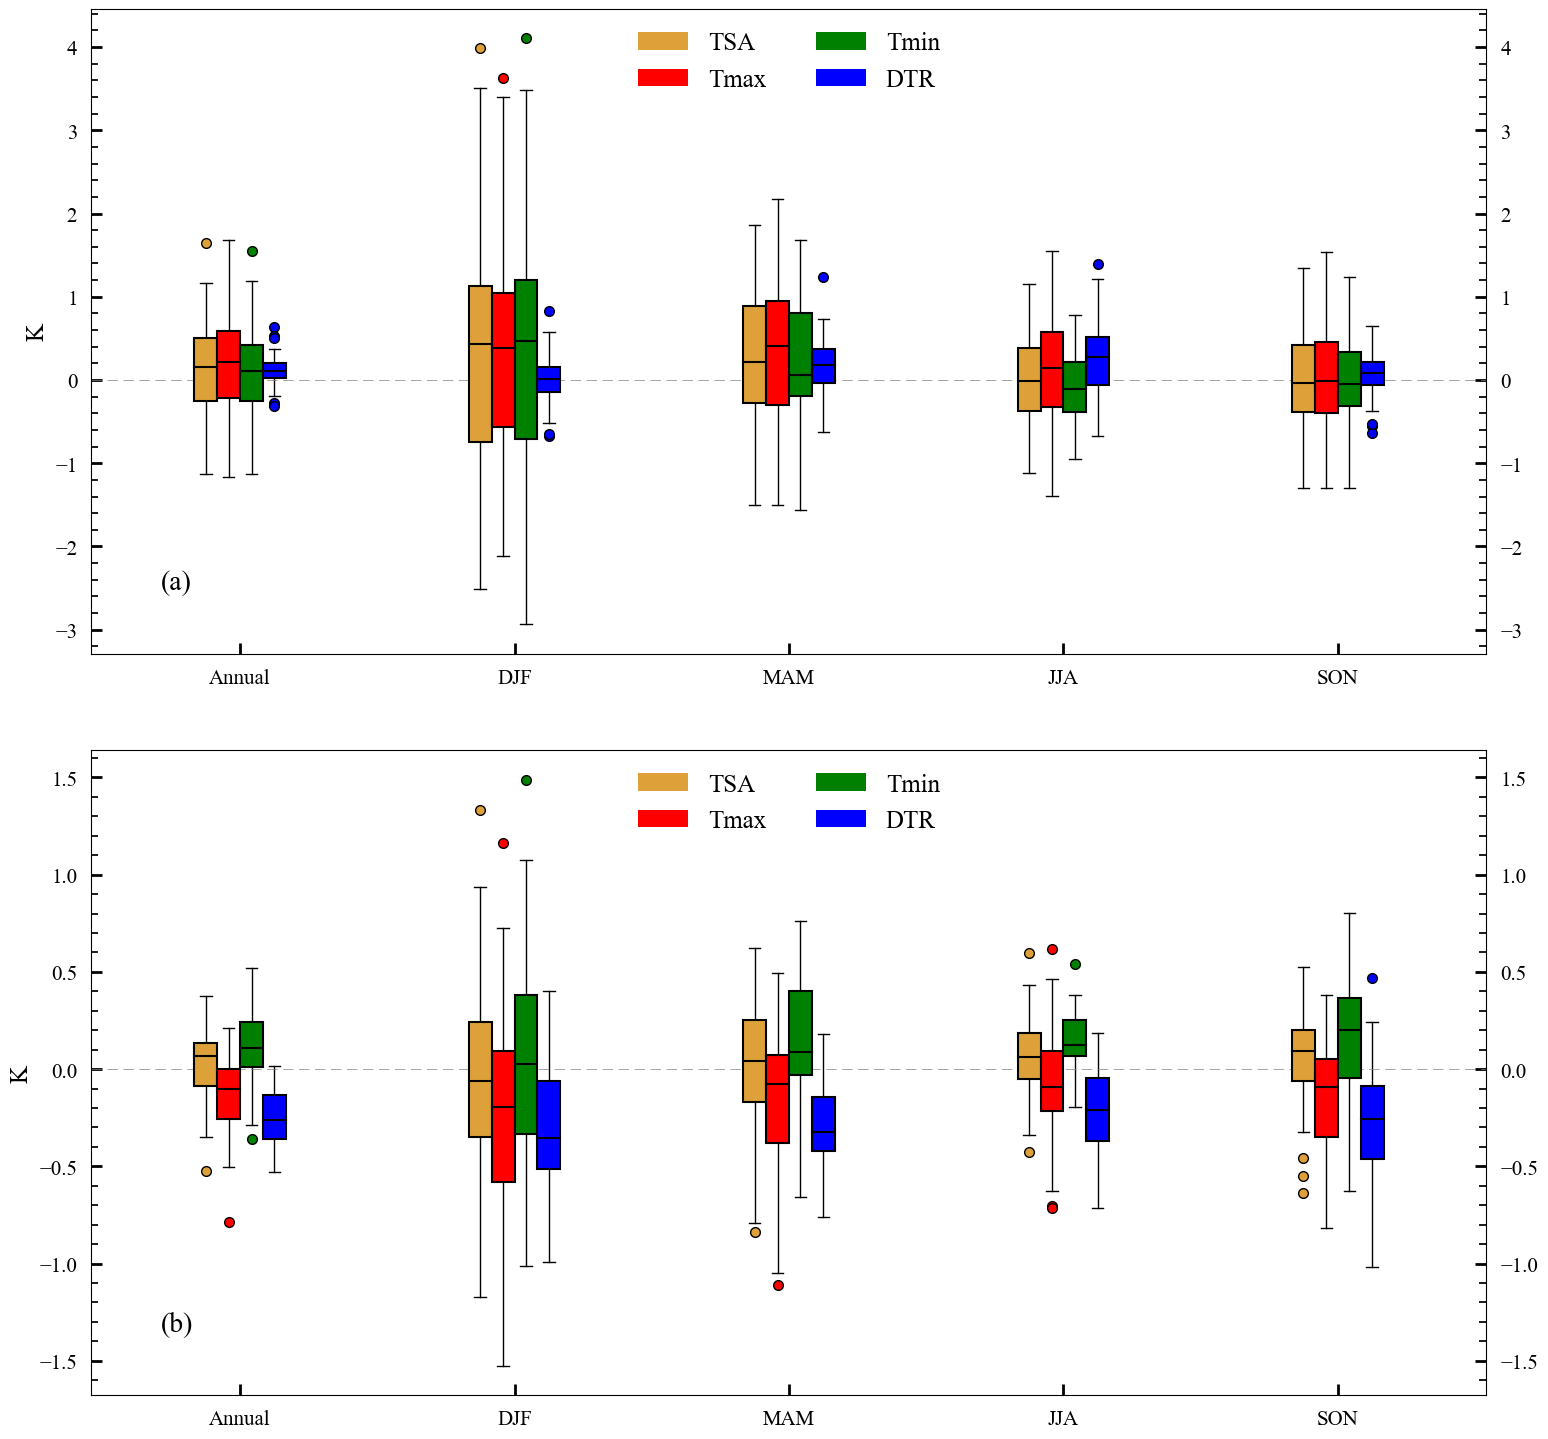

In [10]:
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0, hspace=0.15)
ax = fig.add_subplot(gs[0, 0])
box_tsa = ax.boxplot(type3_region2_season5_data4[0, 0, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax.boxplot(type3_region2_season5_data4[0, 0, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax.boxplot(type3_region2_season5_data4[0, 0, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax.boxplot(type3_region2_season5_data4[0, 0, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax.bar(-10, 0, color='#DEA13A',label='TSA')
ax.bar(-10, 0, color='red',label='Tmax')
ax.bar(-10, 0, color='green',label='Tmin')
ax.bar(-10, 0, color='blue',label='DTR')
ax.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax.set_ylabel('K', fontsize=18)
ax.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax.set_xlim(-0.5, 30)
ax.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(a)', fontsize=20, transform=ax.transAxes)

ax2 = fig.add_subplot(gs[1, 0])
box_tsa = ax2.boxplot(type3_region2_season5_data4[0, 1, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax2.boxplot(type3_region2_season5_data4[0, 1, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax2.boxplot(type3_region2_season5_data4[0, 1, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax2.boxplot(type3_region2_season5_data4[0, 1, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax2.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax2.bar(-10, 0, color='#DEA13A',label='TSA')
ax2.bar(-10, 0, color='red',label='Tmax')
ax2.bar(-10, 0, color='green',label='Tmin')
ax2.bar(-10, 0, color='blue',label='DTR')
ax2.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax2.set_ylabel('K', fontsize=18)
ax2.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax2.set_xlim(-0.5, 30)
ax2.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax2.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(b)', fontsize=20, transform=ax2.transAxes)
# plt.savefig(f'F:\\hwchen\\fig3-diff-fix-tsa-dtr\\picture\\boxplot_fix2009-1960.png', bbox_inches='tight')

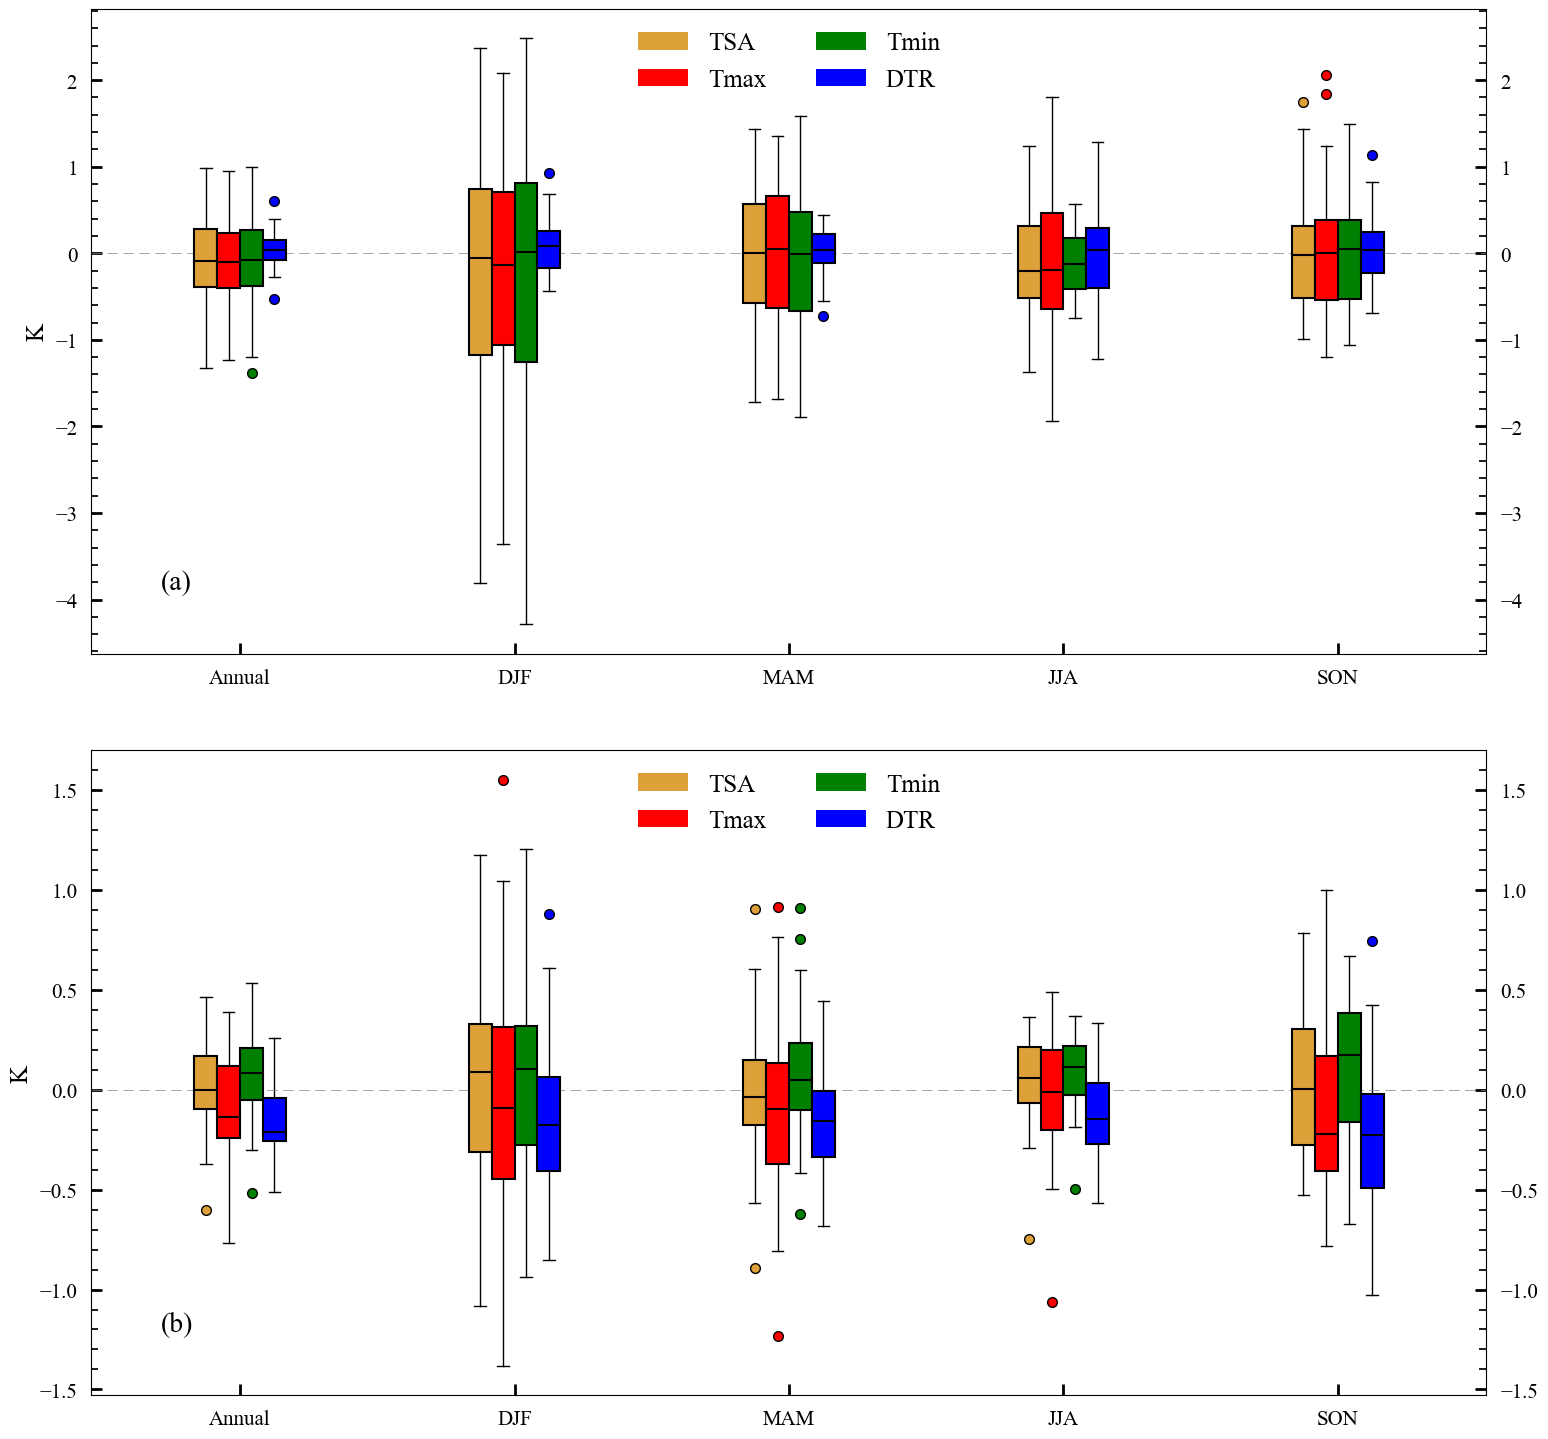

In [11]:
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0, hspace=0.15)
ax = fig.add_subplot(gs[0, 0])
box_tsa = ax.boxplot(type3_region2_season5_data4[1, 0, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax.boxplot(type3_region2_season5_data4[1, 0, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax.boxplot(type3_region2_season5_data4[1, 0, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax.boxplot(type3_region2_season5_data4[1, 0, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax.bar(-10, 0, color='#DEA13A',label='TSA')
ax.bar(-10, 0, color='red',label='Tmax')
ax.bar(-10, 0, color='green',label='Tmin')
ax.bar(-10, 0, color='blue',label='DTR')
ax.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax.set_ylabel('K', fontsize=18)
ax.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax.set_xlim(-0.5, 30)
ax.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(a)', fontsize=20, transform=ax.transAxes)

ax2 = fig.add_subplot(gs[1, 0])
box_tsa = ax2.boxplot(type3_region2_season5_data4[1, 1, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax2.boxplot(type3_region2_season5_data4[1, 1, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax2.boxplot(type3_region2_season5_data4[1, 1, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax2.boxplot(type3_region2_season5_data4[1, 1, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax2.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax2.bar(-10, 0, color='#DEA13A',label='TSA')
ax2.bar(-10, 0, color='red',label='Tmax')
ax2.bar(-10, 0, color='green',label='Tmin')
ax2.bar(-10, 0, color='blue',label='DTR')
ax2.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax2.set_ylabel('K', fontsize=18)
ax2.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax2.set_xlim(-0.5, 30)
ax2.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax2.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(b)', fontsize=20, transform=ax2.transAxes)
# plt.savefig(f'F:\\hwchen\\fig3-diff-fix-tsa-dtr\\picture\\boxplot_dyn-1960.png', bbox_inches='tight')

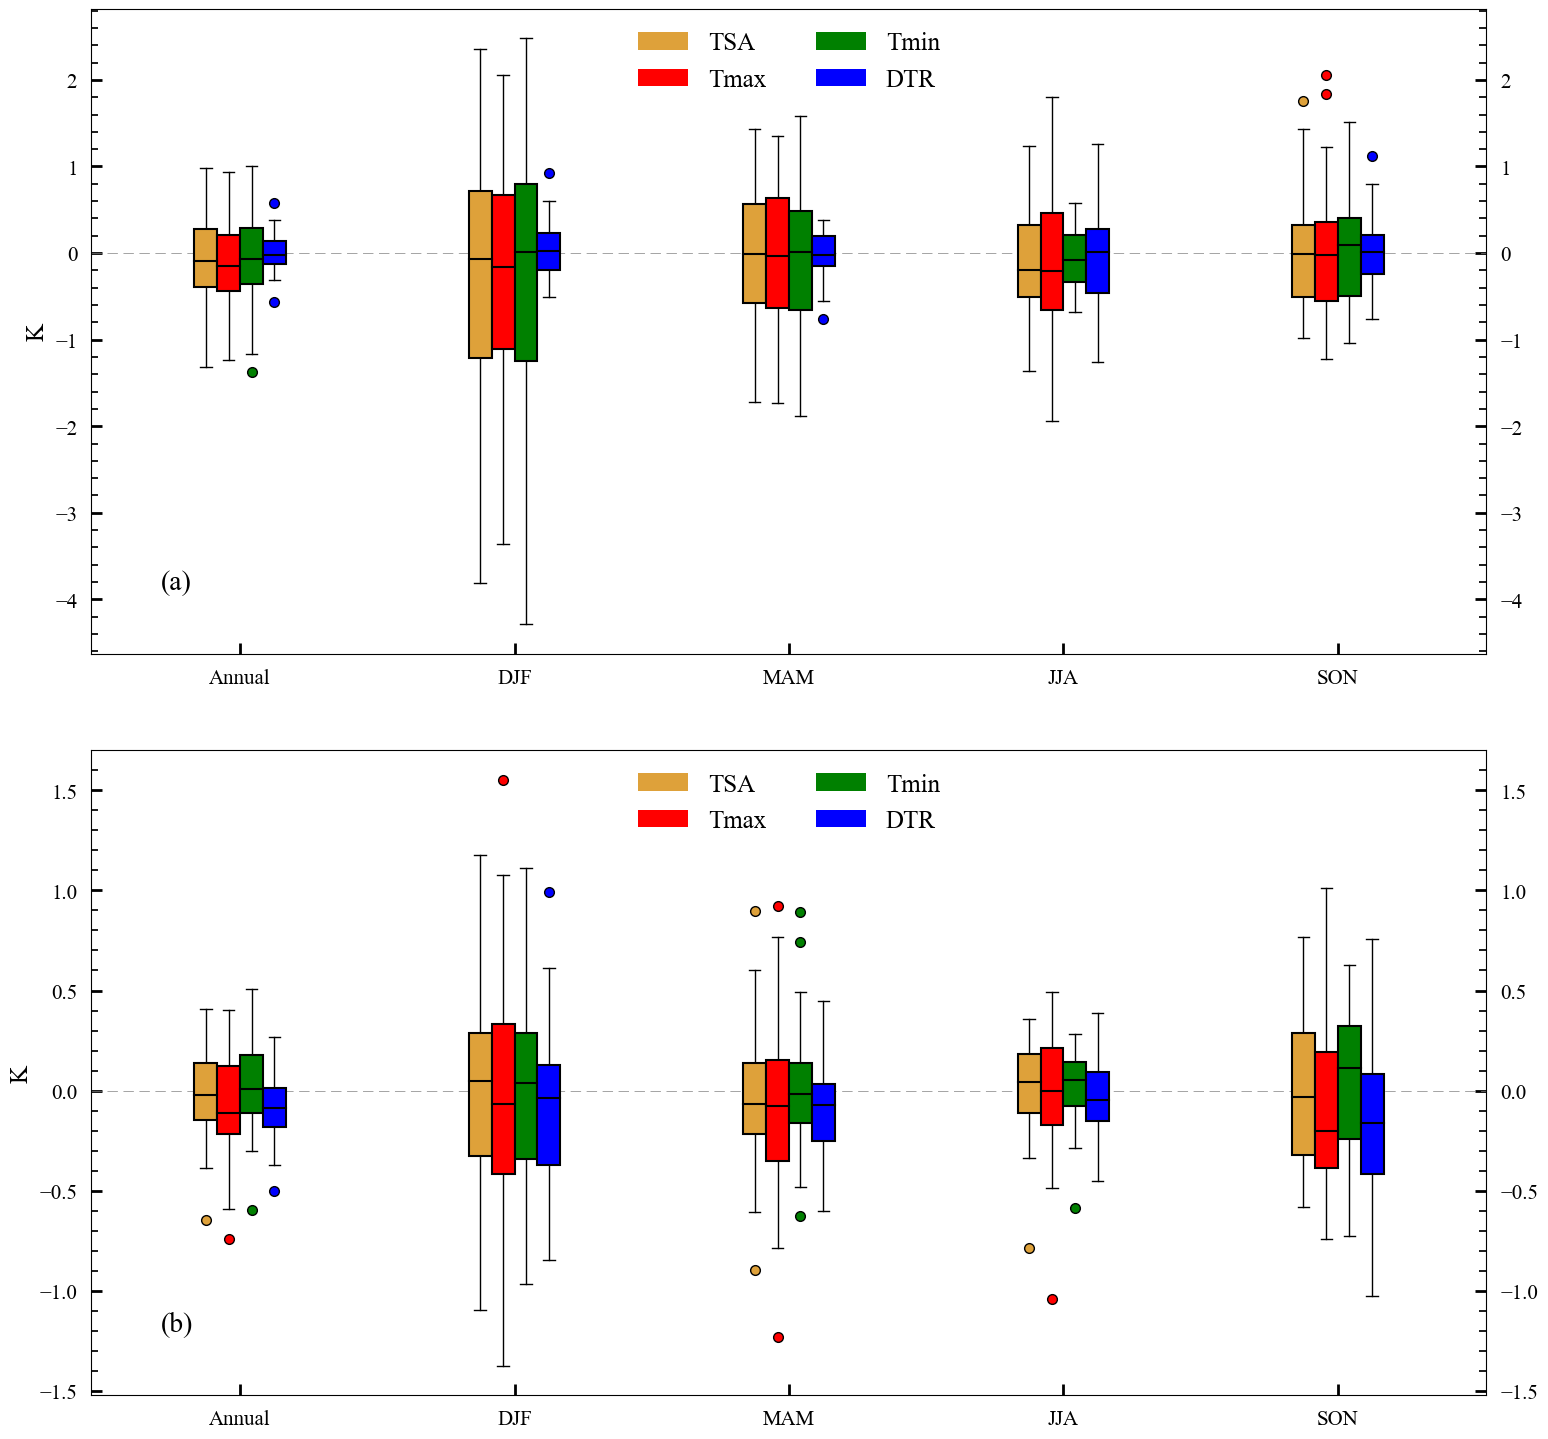

In [12]:
fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(2, 1)
gs.update(wspace=0, hspace=0.15)
ax = fig.add_subplot(gs[0, 0])
box_tsa = ax.boxplot(type3_region2_season5_data4[2, 0, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax.boxplot(type3_region2_season5_data4[2, 0, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax.boxplot(type3_region2_season5_data4[2, 0, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax.boxplot(type3_region2_season5_data4[2, 0, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax.bar(-10, 0, color='#DEA13A',label='TSA')
ax.bar(-10, 0, color='red',label='Tmax')
ax.bar(-10, 0, color='green',label='Tmin')
ax.bar(-10, 0, color='blue',label='DTR')
ax.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax.set_ylabel('K', fontsize=18)
ax.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax.set_xlim(-0.5, 30)
ax.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(a)', fontsize=20, transform=ax.transAxes)

ax2 = fig.add_subplot(gs[1, 0])
box_tsa = ax2.boxplot(type3_region2_season5_data4[2, 1, :, 0, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2, 30, 6),\
           flierprops={"markerfacecolor": "#DEA13A", "markersize": 7}, patch_artist=True)
for box in box_tsa['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='#DEA13A')
box_tsmx = ax2.boxplot(type3_region2_season5_data4[2, 1, :, 1, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(2.5, 30.5, 6),\
           flierprops={"markerfacecolor": "red", "markersize": 7}, patch_artist=True)
for box in box_tsmx['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='red')
box_tsmn = ax2.boxplot(type3_region2_season5_data4[2, 1, :, 2, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3, 31, 6),\
           flierprops={"markerfacecolor": "green", "markersize": 7}, patch_artist=True)
for box in box_tsmn['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='green')
box_dtr = ax2.boxplot(type3_region2_season5_data4[2, 1, :, 3, :].T, medianprops={'color':'black', 'linewidth':'1.5'}, positions=np.arange(3.5, 31.5, 6),\
           flierprops={"markerfacecolor": "blue", "markersize": 7}, patch_artist=True)
for box in box_dtr['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor='blue')
ax2.axhline(0, linewidth=0.5, color='grey', linestyle=(0,(15,8)))
ax2.bar(-10, 0, color='#DEA13A',label='TSA')
ax2.bar(-10, 0, color='red',label='Tmax')
ax2.bar(-10, 0, color='green',label='Tmin')
ax2.bar(-10, 0, color='blue',label='DTR')
ax2.legend(loc='upper center', frameon=False, ncol=2, fontsize=18)
ax2.set_ylabel('K', fontsize=18)
ax2.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=False, labelright=True, pad=10)
ax2.tick_params(axis="both", which='minor', width=1.25, length=5, direction='in', right=True, top=False)
ax2.set_xlim(-0.5, 30)
ax2.set_xticks([2.75, 8.75, 14.75, 20.75, 26.75])
ax2.set_xticklabels(['Annual', 'DJF', 'MAM', 'JJA', 'SON'])
plt.text(0.05, 0.1, f'(b)', fontsize=20, transform=ax2.transAxes)
# plt.savefig(f'F:\\hwchen\\fig3-diff-fix-tsa-dtr\\picture\\boxplot_fc5-ic45.png', bbox_inches='tight')